## ！Prerequisites: [celluloid](https://pypi.org/project/celluloid/) python package required

In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import matplotlib.pyplot as plt
import oommfc as oc
import random
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='svg'
thickness = 2e-9
cell = (2e-9, 2e-9, 2e-9)
p1 = (-400e-9, -50e-9, -thickness/2)
p2 = (400e-9, 50e-9, thickness/2)
region=df.Region(p1=p1,p2=p2)
mesh = df.Mesh(region=region, cell=cell)
system = mm.System(name='dynamic_plot')

In [2]:
def initial_state(pos):
    x, y = pos[0], pos[1]
    if ((x+300e-9)**2+y**2)**0.5<20e-9:
        m = (0,0,-1)
    else:
        m = (0, 0, 1)
    return m
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=0.3)
system.energy = mm.Exchange(A=1e-11)+mm.DMI(D=3.2e-3, crystalclass='Cnv_z')+mm.UniaxialAnisotropy(K=0.8e6, u=(0,0,1))
system.m =  df.Field(mesh, dim=3, value=initial_state, norm=5.8e5)
ad = oc.MinDriver()
ad.drive(system)

Running OOMMF (ExeOOMMFRunner)[2022/09/26 13:11]... (12.2 s)


In [3]:
import micromagneticdata as md
data=md.Data(system.name)
data.info

,drive_number,date,time,driver
0,0,2022-09-26,13:11:44,MinDriver


In [4]:
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=0.3) + mm.ZhangLi(u=300,beta=0.2)
system.energy = mm.Exchange(A=1e-11)+mm.DMI(D=3.2e-3, crystalclass='Cnv_z')+mm.UniaxialAnisotropy(K=0.8e6, u=(0,0,1))
system.m =data[0][0]
md = oc.TimeDriver()
md.drive(system,t=1e-9,n=50,verbose=2)

Running OOMMF (ExeOOMMFRunner):   0%|          | 0/50 files written [00:00]

MovieWriter PillowWriter unavailable; using Pillow instead.


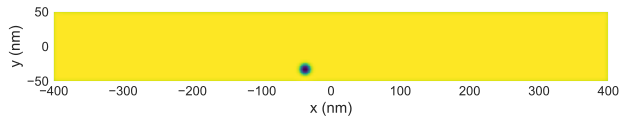

In [17]:
from matplotlib import pyplot as plt
from celluloid import Camera
import numpy as np
from IPython.display import HTML

fig=plt.figure(figsize=(10,3),dpi=300)
ax=fig.add_subplot(111)
camera = Camera(fig)
for i in range(50):
    data[1][i].z.plane('z').mpl.scalar(ax=ax,colorbar=False)
    camera.snap()

animation = camera.animate()
animation.save('dynamic plot.gif', writer='PillowWriter', fps=15)